In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from configs import configs

In [19]:
config = configs[0]

training_metrics = pd.read_csv(config['results_folder'] + '/history.csv')
human_and_val_metrics = pd.read_csv(config['results_folder'] + '/history_human.csv')

epochs = training_metrics.shape[0]

Compute F1-score from precision and recall

In [20]:
human_and_val_metrics['f1_score'] = 2 * (human_and_val_metrics['precision'] * human_and_val_metrics['recall']) / (human_and_val_metrics['precision'] + human_and_val_metrics['recall'])
human_and_val_metrics['val_f1_score'] = 2 * (human_and_val_metrics['val_precision'] * human_and_val_metrics['val_recall']) / (human_and_val_metrics['val_precision'] + human_and_val_metrics['val_recall'])

training_metrics['f1_score'] = 2 * (training_metrics['precision'] * training_metrics['recall']) / (training_metrics['precision'] + training_metrics['recall'])

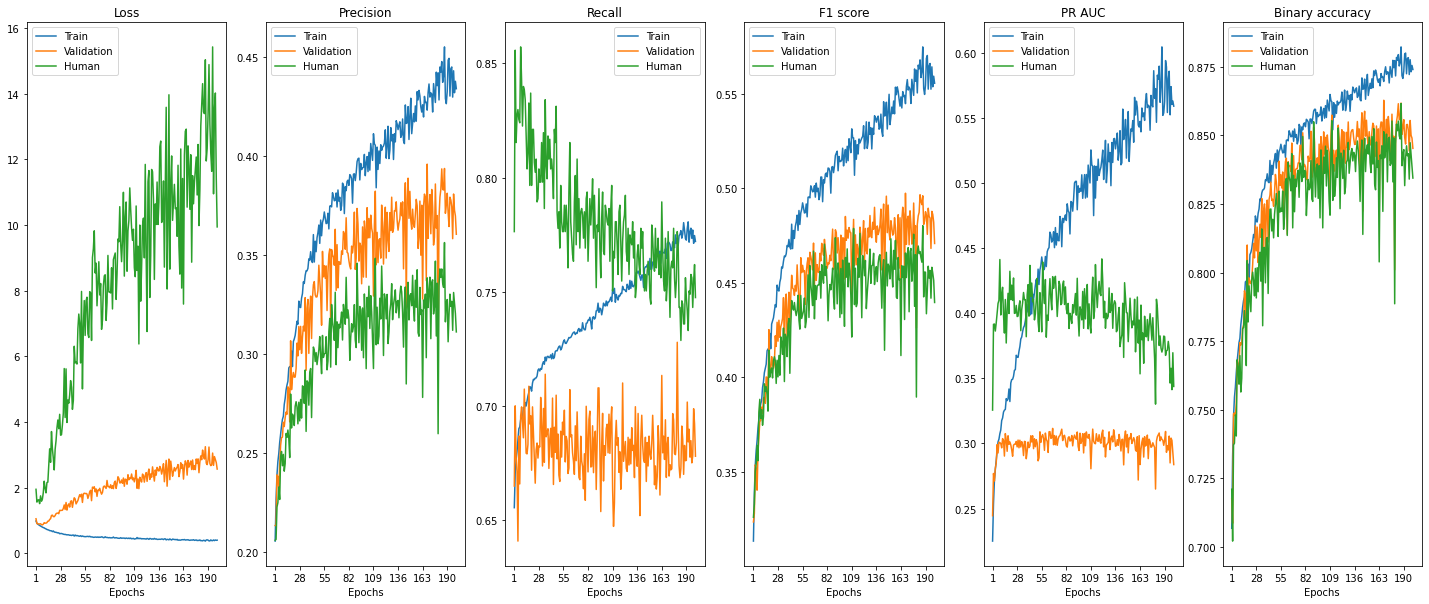

In [23]:
plt.figure(figsize=(25,10))
step = 27
_ = plt.subplot(1, 6, 1)
plt.plot(range(config['epochs']), training_metrics.loss.values)
plt.plot(range(config['epochs']), human_and_val_metrics.val_loss.values)
plt.plot(range(config['epochs']), human_and_val_metrics.loss.values)
plt.title('Loss')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=step), np.arange(1, config['epochs'], step=step))
plt.legend(['Train', 'Validation', 'Human'])

_ = plt.subplot(1, 6, 2)
plt.plot(range(config['epochs']), training_metrics.precision.values, label='Training precision')
plt.plot(range(config['epochs']), human_and_val_metrics.val_precision.values, label='Validation precision')
plt.plot(range(config['epochs']), human_and_val_metrics.precision.values)
plt.title('Precision')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=step), np.arange(1, config['epochs'], step=step))
plt.legend(['Train', 'Validation', 'Human'])

_ = plt.subplot(1, 6, 3)
plt.plot(range(config['epochs']), training_metrics.recall.values, label='Training recall')
plt.plot(range(config['epochs']), human_and_val_metrics.val_recall.values, label='Validation recall')
plt.plot(range(config['epochs']), human_and_val_metrics.recall.values)
plt.title('Recall')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=step), np.arange(1, config['epochs'], step=step))
plt.legend(['Train', 'Validation', 'Human'])


_ = plt.subplot(1, 6, 4)
plt.plot(range(config['epochs']), training_metrics.f1_score.values, label='Training f1-score')
plt.plot(range(config['epochs']), human_and_val_metrics.val_f1_score.values, label='Validation f1-score')
plt.plot(range(config['epochs']), human_and_val_metrics.f1_score.values)
plt.title('F1 score')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=step), np.arange(1, config['epochs'], step=step))
plt.legend(['Train', 'Validation', 'Human'])

_ = plt.subplot(1, 6, 5)
plt.plot(range(config['epochs']), training_metrics.pr_auc.values, label='Training PR_AUC')
plt.plot(range(config['epochs']), human_and_val_metrics.val_pr_auc.values, label='Validation PR_AUC')
plt.plot(range(config['epochs']), human_and_val_metrics.pr_auc.values)
plt.title('PR AUC')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=step), np.arange(1, config['epochs'], step=step))
plt.legend(['Train', 'Validation', 'Human'])

_ = plt.subplot(1, 6, 6)
plt.plot(range(config['epochs']), training_metrics.binary_accuracy.values, label='Training binary acc')
plt.plot(range(config['epochs']), human_and_val_metrics.val_binary_accuracy.values, label='Validation binary acc')
plt.plot(range(config['epochs']), human_and_val_metrics.binary_accuracy.values)
plt.title('Binary accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=step), np.arange(1, config['epochs'], step=step))
plt.legend(['Train', 'Validation', 'Human'])


In [30]:
sorted_indices = human_and_val_metrics['f1_score'].sort_values(ascending=False).index
print(sorted_indices[0:20])

Int64Index([186, 110, 117, 176,  90, 151, 156,  78, 181, 170, 173, 103, 128,
            154,  66, 180, 183, 172, 146, 167],
           dtype='int64')


In [27]:
max_pr_auc_index = human_and_val_metrics['pr_auc'].idxmax()
print(f'Checkpoint weights for which human val pr_auc is the greatest: {max_pr_auc_index}')

max_f1score_index = human_and_val_metrics['f1_score'].idxmax()
print(f'Checkpoint weights for which human val f1_score is the greatest: {max_f1score_index}')

Checkpoint weights for which human val pr_auc is the greatest: 120
Checkpoint weights for which human val f1_score is the greatest: 186


In [8]:
import help_functions as hf
hf.save_img(config['results_folder'] + '/training_metrics.png')

Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>